### Notebook Used in Part 2 of Basic NFL Data Analysis

This is the notebook I used for Part 2 of our Basic analysis of NFL games.
- NFL Season: 2018-19

Ram Narasimhan

Questions? Twitter: @ramnarasimhan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### All the Preprocessing Steps that we did in Part 1 one cell

In [4]:
base = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_"
year = 2018
coda = ".csv"
url = base + str(year) + coda

df = pd.read_csv(url)

# There are some columns that we don't want. Let's drop those
drop_columns = ['type', 'state_of_game', 'game_url']

# axis = 1 is to tell Pandas to drop the columns.
# inplace = True drops them permanently
df.drop(columns=drop_columns, axis=1, inplace=True)

# We create two new columns in the data frame and store it. 
# This column can take negative values (if the home team lost) or positive values (if the home team won)
df['home_adv_score'] = df['home_score'] - df['away_score']

#THe following line creates a new column, with True/False values for whether the home team won
df['home_win'] = df['home_adv_score'] >= 0 
df['away_win'] = df['home_adv_score'] < 0 

In [5]:
print(df.shape) #one row for each game that was played
df.head()

(256, 10)


,game_id,home_team,away_team,week,season,home_score,away_score,home_adv_score,home_win,away_win
0,2018090600,PHI,ATL,1,2018,18,12,6,True,False
1,2018090900,BAL,BUF,1,2018,47,3,44,True,False
2,2018090907,NYG,JAX,1,2018,15,20,-5,False,True
3,2018090906,NO,TB,1,2018,40,48,-8,False,True
4,2018090905,NE,HOU,1,2018,27,20,7,True,False


### Filter down to one Team, calculate its statistics

In [6]:
teams = df['home_team'].unique()
teams #now we have a nice list. We can use it

array(['PHI', 'BAL', 'NYG', 'NO', 'NE', 'MIN', 'MIA', 'IND', 'CLE', 'LAC',
       'DEN', 'CAR', 'ARI', 'GB', 'DET', 'OAK', 'CIN', 'ATL', 'WAS',
       'TEN', 'TB', 'PIT', 'NYJ', 'BUF', 'SF', 'LA', 'JAX', 'DAL', 'CHI',
       'HOU', 'KC', 'SEA'], dtype=object)

In [7]:
home_played = []
home_wins = []
home_losses = []

for team in teams:
    home_team_rows = df['home_team'] == team
    home_team_games = len(df[home_team_rows])
    home_team_wins = df[home_team_rows]['home_win'].sum()
    home_team_losses = home_team_games - home_team_wins
    
    home_played.append( home_team_games)
    home_wins.append( home_team_wins)
    home_losses.append( home_team_losses)
        

We do the exact same things, but for AWAY GAMES

In [8]:
away_played = []
away_wins = []
away_losses = []

for team in teams:
    away_team_rows = df['away_team'] == team
    away_team_games = len(df[away_team_rows])
    away_team_wins = df[away_team_rows]['away_win'].sum()
    away_team_losses = away_team_games - away_team_wins
    
    away_played.append( away_team_games)
    away_wins.append( away_team_wins)
    away_losses.append( away_team_losses)


Put it all together in one data frame. It is very important that ALL of our columns be of the exact same length, and they should be in the exact same order of teams. Otherwise, we risk jumbling up the results, which we don't want.

In [9]:
#store the result in a new data frame
df_record = pd.DataFrame({'Team': teams, 'HP': home_played, 'HW': home_wins, 'HL': home_losses, 
              'AP': away_played, 'AW': away_wins, 'AL': away_losses})

In [10]:
# Add the two final columns
df_record['Wins'] = df_record['HW'] + df_record['AW']
df_record['Losses'] = df_record['HL'] + df_record['AL']

# Customizing a Bar Plot 

We want to make it look exactly a certain way.

Goal: Show the wins as positive numbers and losses as negative bars. The bars have to be stacked.
And every bar has to have the same "Zero" point. Let's see how to achieve this using Pandas and Matplotlib.

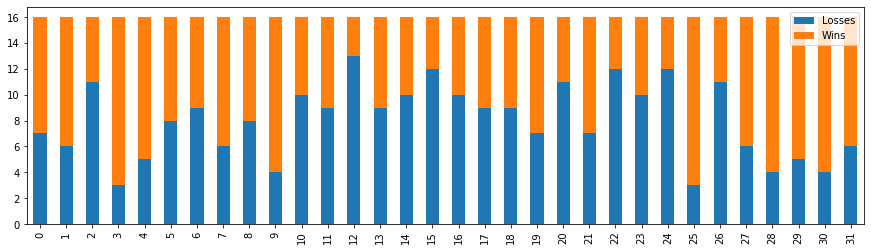

In [18]:
cols = ['Losses', 'Wins']
df_record[cols].plot(kind='bar', stacked=True, figsize=(15, 4))

### The padding trick

In [19]:
df_record['pad'] = 16 - df_record['Losses']

### Custom Colors

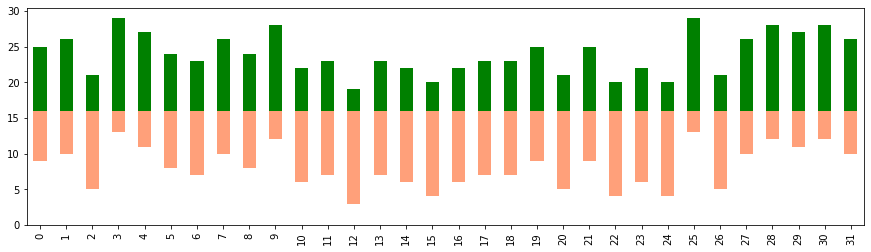

In [22]:
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
df_record[cols].plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

### Set Index

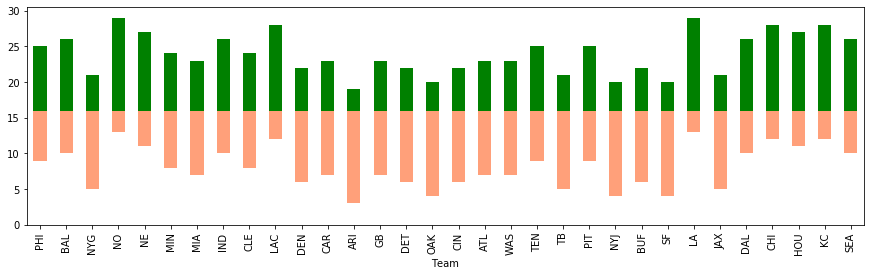

In [23]:
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
df_record.set_index('Team')[cols].plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

### Sort By Wins

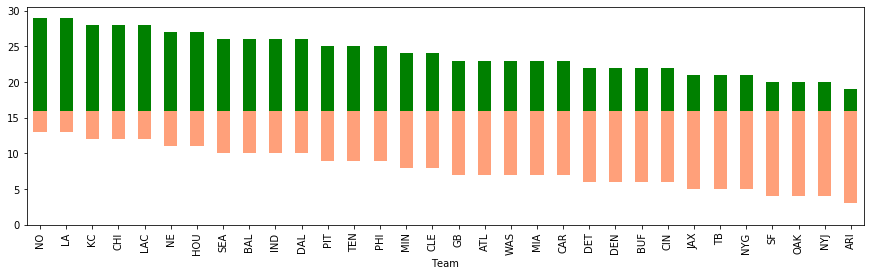

In [27]:
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
df_record.set_index('Team')[cols].sort_values('Wins', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

### Changing the Y-axis Labels

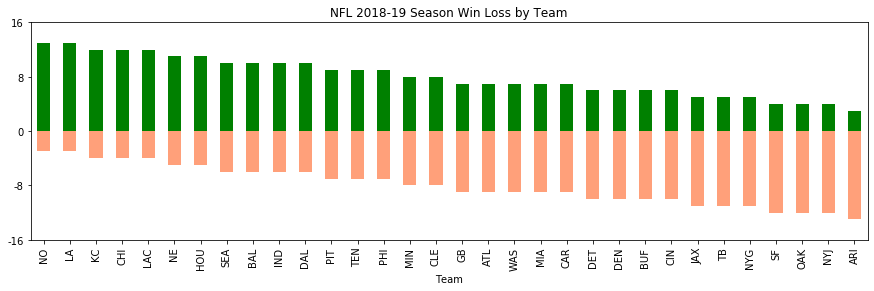

In [33]:
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
df_record.set_index('Team')[cols].sort_values('Wins', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

tick_pos = [0, 8, 16, 24, 32]
custom_labels = [-16, -8, 0, 8, 16]
plt.yticks(ticks=tick_pos, labels=custom_labels);
plt.title('NFL 2018-19 Season Win Loss by Team');

### Save the figure

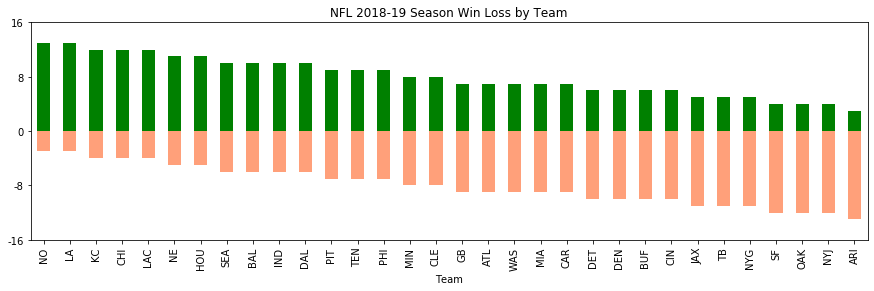

In [35]:
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
df_record.set_index('Team')[cols].sort_values('Wins', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

tick_pos = [0, 8, 16, 24, 32]
custom_labels = [-16, -8, 0, 8, 16]
plt.yticks(ticks=tick_pos, labels=custom_labels)
plt.title('NFL 2018-19 Season Win Loss by Team')
plt.savefig('../images/win_loss.JPG')

This is the plot that we wanted, with a zero base and custom colors.